In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

pd.set_option('display.max_columns', 500)
original_dataset = None

In [5]:
train = pd.read_csv(r"./input/train.csv")
test = pd.read_csv(r"./input/test.csv")
train["Train"] = 1
test["Train"] = 0
dataset = pd.concat(objs=[train, test],sort = False, axis = 0).reset_index(drop = True)

In [6]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [7]:
# Let's see what features do we have here...

print(dataset.columns.values)
print(len(dataset.columns.values))

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
print(dataset.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object


What are the elements that are null?

In [8]:
null_values = []
for col in dataset.columns.values:
    null_values.append([col , dataset[col].isnull().sum()])

for el, tot in sorted(null_values, key = lambda item: item[1], reverse = True):
    print(el, tot)

PoolQC 2909
MiscFeature 2814
Alley 2721
Fence 2348
SalePrice 1459
FireplaceQu 1420
LotFrontage 486
GarageYrBlt 159
GarageFinish 159
GarageQual 159
GarageCond 159
GarageType 157
BsmtCond 82
BsmtExposure 82
BsmtQual 81
BsmtFinType2 80
BsmtFinType1 79
MasVnrType 24
MasVnrArea 23
MSZoning 4
Utilities 2
BsmtFullBath 2
BsmtHalfBath 2
Functional 2
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
KitchenQual 1
GarageCars 1
GarageArea 1
SaleType 1
Id 0
MSSubClass 0
LotArea 0
Street 0
LotShape 0
LandContour 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
ExterQual 0
ExterCond 0
Foundation 0
Heating 0
HeatingQC 0
CentralAir 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
P

## Filling up the missing features

**Note**: apparently sklearn LabelEncoder labels in alphabetical order. This is a problem here, since I want to preserve the quality ordering of most of the classes.

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Encoding "Miscellaneous Features" in multiple columns.

le = LabelEncoder().fit(list(dataset.MiscFeature.values))
print(le.classes_)
for cl in le.classes_:
    if cl != "nan":
        dataset["MiscFeature_"+cl] = 0
        dataset.loc[dataset.MiscFeature == cl, "MiscFeature_"+cl] = dataset.loc[dataset.MiscFeature==cl, "MiscVal"]

dataset = dataset.drop(columns = ["MiscFeature", "MiscVal"])
dataset.head()

['Gar2' 'Othr' 'Shed' 'TenC' 'nan']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,2,2008,WD,Normal,208500.0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,5,2007,WD,Normal,181500.0,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,9,2008,WD,Normal,223500.0,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,2,2006,WD,Abnorml,140000.0,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,12,2008,WD,Normal,250000.0,1,0,0,0,0


In [8]:
# Fill "Alley"
dataset.loc[dataset.Alley.isnull(), "Alley"] = "NoAlley"

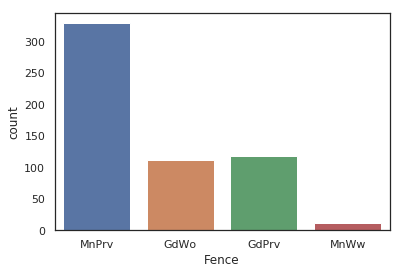

In [9]:
# Fence
sns.countplot(x = "Fence", data = dataset)    
dataset.loc[dataset.Fence.isnull(), "Fence"] = "NoFence"

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([101.,   5.,  21.,  69.,  68., 125., 272., 470., 531., 575., 327.,
        186.,  98.,  42.,  13.,  10.,   3.,   1.,   0.,   2.]),
 array([1.32221929, 1.38088555, 1.4395518 , 1.49821805, 1.5568843 ,
        1.61555056, 1.67421681, 1.73288306, 1.79154931, 1.85021556,
        1.90888182, 1.96754807, 2.02621432, 2.08488057, 2.14354682,
        2.20221308, 2.26087933, 2.31954558, 2.37821183, 2.43687809,
        2.49554434]),
 <a list of 20 Patch objects>)

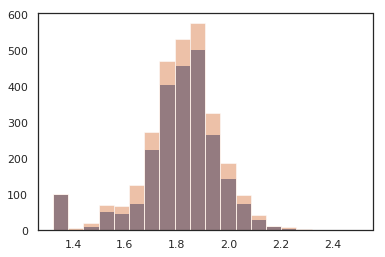

In [10]:
# LotFrontage
dataset["LotFrontage_log10"] = np.log10(dataset["LotFrontage"])
plt.hist(dataset["LotFrontage_log10"],bins = 20)
mu = dataset.LotFrontage_log10.mean()
std = dataset.LotFrontage_log10.std()
dataset.loc[dataset.LotFrontage_log10.isnull(), "LotFrontage_log10"] = mu + std*np.random.randn(dataset.LotFrontage_log10.isnull().sum())
dataset.loc[dataset.LotFrontage.isnull(), "LotFrontage"] = 10**dataset.loc[dataset.LotFrontage.isnull(), "LotFrontage_log10"]
plt.hist(dataset["LotFrontage_log10"],bins = 20, alpha = 0.5)

In [11]:
# Looks like there are missing data... let's see if we can fill them in!

# Ehi! There is a house with a garage built 200 years from now! 
# Possibly a type. I think they meant 2007. The house was built in 2006, and remodernated in 2007.
dataset.loc[dataset.GarageYrBlt == 2207, "GarageYrBlt"] = 2007

In [12]:
# Garage year built/garage yr finished
print("Total houses without garage built year: ", len(dataset.loc[dataset.GarageYrBlt.isnull(), "GarageType"]))
print("Total houses without garage: ", dataset.GarageType.isnull().sum())
for i in ['GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']:
    print("Total houses without ",i,": ", dataset[i].isnull().sum())

Total houses without garage built year:  159
Total houses without garage:  157
Total houses without  GarageFinish :  159
Total houses without  GarageCars :  1
Total houses without  GarageArea :  1
Total houses without  GarageQual :  159
Total houses without  GarageCond :  159


In [13]:
dataset.loc[dataset.GarageArea.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2576,2577,70,RM,50.0,9060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,3,2007,WD,Alloca,NaN,0,0,0,0,0,1.69897


This entry clearly has missing data for the garage. Let's try to infer them.

In [14]:
thishouseId = dataset.GarageArea.isnull()
mask =  (dataset.MSSubClass == dataset[thishouseId].MSSubClass.values[0]) &\
        (dataset.Neighborhood == dataset[thishouseId].Neighborhood.values[0]) &\
        ~dataset.GarageYrBlt.isnull()
print(dataset.loc[thishouseId, ["Neighborhood","GarageYrBlt", "YearBuilt", "YearRemodAdd"]])
dataset.loc[mask,["Neighborhood","GarageYrBlt", "YearBuilt", "YearRemodAdd"]]

     Neighborhood  GarageYrBlt  YearBuilt  YearRemodAdd
2576       IDOTRR          NaN       1923          1999


,Neighborhood,GarageYrBlt,YearBuilt,YearRemodAdd
30,IDOTRR,1920.0,1920,1950
329,IDOTRR,1920.0,1920,1950
365,IDOTRR,1964.0,1920,1997
1832,IDOTRR,1927.0,1927,1950
1912,IDOTRR,1998.0,1900,1993
2129,IDOTRR,1952.0,1952,1952
2217,IDOTRR,1895.0,1895,1950
2219,IDOTRR,1920.0,1920,1950
2250,IDOTRR,1900.0,1900,1950
2798,IDOTRR,2001.0,1910,2004


Since the neighbourhood is the same and the houses built in the '20s had their garage built at the same time, I'll set the missing data as follows

     GarageFinish  GarageCars  GarageArea GarageCond GarageQual
2576          NaN         NaN         NaN        NaN        NaN


,GarageFinish,GarageCars,GarageArea,GarageCond,GarageQual
30,Unf,1.0,250.0,Fa,TA
329,Unf,1.0,189.0,Fa,Fa
365,Unf,1.0,468.0,Fa,TA
1832,Unf,1.0,316.0,TA,TA
1912,Unf,2.0,576.0,TA,TA
2129,Unf,1.0,308.0,TA,TA
2217,Unf,1.0,185.0,TA,Fa
2219,Unf,1.0,216.0,Fa,Fa
2250,Unf,1.0,288.0,Fa,TA
2798,Unf,1.0,390.0,TA,TA


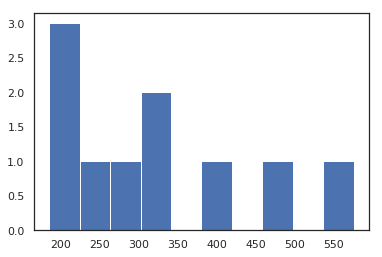

In [15]:
dataset.loc[thishouseId, "GarageYrBlt"] = int(dataset.loc[thishouseId, "YearBuilt"])
print(dataset.loc[thishouseId, ["GarageFinish","GarageCars","GarageArea","GarageCond","GarageQual"]])
plt.hist(dataset[mask].GarageArea)
dataset.loc[mask, ["GarageFinish","GarageCars","GarageArea","GarageCond","GarageQual"]]

In [16]:
dataset.loc[thishouseId,"GarageFinish"] = "Unf"
dataset.loc[thishouseId,"GarageCars"] = 1.0
dataset.loc[thishouseId,"GarageArea"] = dataset[mask].GarageArea.median()
dataset.loc[thishouseId,"GarageQual"] = "TA"
dataset.loc[thishouseId,"GarageCond"] = "TA"
print(dataset.loc[thishouseId, ["GarageFinish","GarageCars","GarageArea","GarageCond","GarageQual"]])

     GarageFinish  GarageCars  GarageArea GarageCond GarageQual
2576          Unf         1.0       298.0         TA         TA


In [17]:
print("Total houses without garage built year: ", len(dataset.loc[dataset.GarageYrBlt.isnull(), "GarageType"]))
print("Total houses without garage: ", dataset.GarageType.isnull().sum())
for i in ['GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']:
    print("Total houses without ",i,": ", dataset[i].isnull().sum())
dataset[dataset.GarageYrBlt.isnull() & ~dataset.GarageType.isnull()]

Total houses without garage built year:  158
Total houses without garage:  157
Total houses without  GarageFinish :  158
Total houses without  GarageCars :  0
Total houses without  GarageArea :  0
Total houses without  GarageQual :  158
Total houses without  GarageCond :  158


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2126,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,9,2008,WD,Normal,NaN,0,0,0,1000,0,1.755875


In [18]:
thishouseId = dataset[dataset.GarageYrBlt.isnull() & ~dataset.GarageType.isnull()].index
dataset.loc[thishouseId].MSSubClass.values[0]
mask =  (dataset.MSSubClass == dataset.loc[thishouseId].MSSubClass.values[0]) &\
        (dataset.Neighborhood == dataset.loc[thishouseId].Neighborhood.values[0])
print(dataset.loc[thishouseId, ["Neighborhood","GarageYrBlt", "YearBuilt", "YearRemodAdd"]])
dataset.loc[mask,["Neighborhood","GarageYrBlt", "YearBuilt", "YearRemodAdd",'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

     Neighborhood  GarageYrBlt  YearBuilt  YearRemodAdd
2126      OldTown          NaN       1910          1983


,Neighborhood,GarageYrBlt,YearBuilt,YearRemodAdd,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
425,OldTown,1947.0,1946,1992,Unf,1.0,240.0,TA,TA
1782,OldTown,1939.0,1939,2006,Unf,2.0,720.0,TA,TA
2126,OldTown,NaN,1910,1983,NaN,1.0,360.0,NaN,NaN


In [19]:
dataset.loc[thishouseId, "GarageYrBlt"] = dataset.loc[thishouseId, "YearBuilt"]
dataset.loc[thishouseId, "GarageFinish"] = "Unf"
dataset.loc[thishouseId, "GarageQual"] = "TA"
dataset.loc[thishouseId, "GarageCond"] = "TA"

In [20]:
dataset.loc[dataset.GarageFinish.isnull(), "GarageFinish"] = "NA"
dataset.loc[dataset.GarageCond.isnull(), "GarageCond"] = "NA"
dataset.loc[dataset.GarageQual.isnull(), "GarageQual"] = "NA"
dataset.loc[dataset.GarageType.isnull(), "GarageType"] = "NA"
for i in ['GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond', "GarageType"]:
    print("Total houses without ",i,": ", dataset[i].isnull().sum())

Total houses without  GarageFinish :  0
Total houses without  GarageCars :  0
Total houses without  GarageArea :  0
Total houses without  GarageQual :  0
Total houses without  GarageCond :  0
Total houses without  GarageType :  0


In [21]:
dataset.loc[dataset.GarageYrBlt.isnull(),"GarageYrBlt"] = 0

In [22]:
dataset.loc[dataset.TotalBsmtSF.isnull(), "TotalBsmtSF"] =0

All the houses with 0 area for the basemat have no BsmtCond. Let's ovewrite this to a clearer label

In [23]:
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtCond"] = "NA"
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtQual"] = "NA"
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtExposure"] = "NA"
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtFinType1"] = "NA"
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtFinSF1"] = 0
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtFinType2"] = "NA"
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtFinSF2"] = 0
dataset.loc[(dataset.TotalBsmtSF == 0), "BsmtUnfSF"] = 0

In [24]:
dataset[dataset.BsmtCond.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2040,2041,20,RL,103.0,16280,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,NaN,GdWo,5,2008,WD,Normal,NaN,0,0,0,0,0,2.012837
2185,2186,20,RL,65.0,6500,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,NaN,NoFence,5,2008,WD,Normal,NaN,0,0,0,0,0,1.812913
2524,2525,80,RL,72.0,9720,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,6,2007,WD,Normal,NaN,0,0,0,0,0,1.857332


In [25]:
for ident in dataset[dataset.BsmtCond.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.LandSlope == thishouse.LandSlope) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    try:
        dataset.loc[ident, "BsmtCond"] = dataset.loc[mask, "BsmtCond"].mode().values
    except ValueError:
        dataset.loc[ident, "BsmtCond"] = dataset.loc[mask, "BsmtCond"].mode().values[0]                
    print(dataset.loc[ident, "BsmtCond"])

2040
TA
2185
TA
2524
Gd


In [26]:
dataset[dataset.BsmtExposure.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
948,949,60,RL,65.0,14006,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NoFence,2,2006,WD,Normal,192500.0,1,0,0,0,0,1.812913
1487,1488,20,RL,73.0,8987,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NoFence,5,2010,WD,Normal,NaN,0,0,0,0,0,1.863323
2348,2349,60,FV,81.0,10411,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NoFence,7,2007,New,Partial,NaN,0,0,0,0,0,1.908485


948
1487
2348


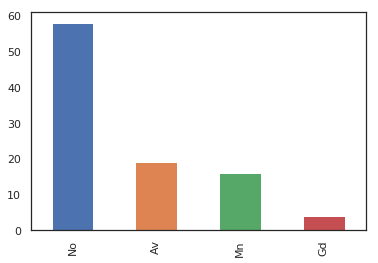

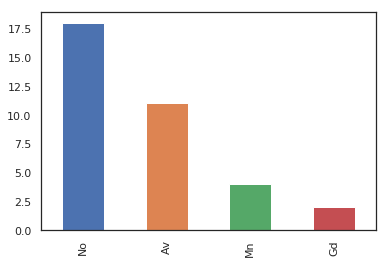

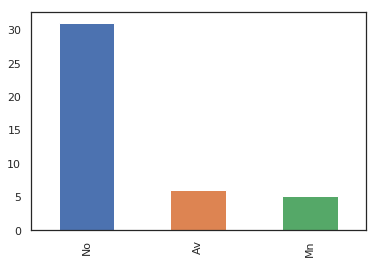

In [27]:
for ident in dataset[dataset.BsmtExposure.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.LandSlope == thishouse.LandSlope) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    plt.figure()
    dataset.loc[mask, "BsmtExposure"].value_counts().plot(kind = "bar")
    dataset.loc[ident, "BsmtExposure"] = dataset.loc[mask, "BsmtExposure"].mode().values[0]

In [28]:
dataset[dataset.BsmtQual.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2217,2218,70,C (all),60.0,5280,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,NaN,NoFence,7,2008,WD,Normal,NaN,0,0,0,0,0,1.778151
2218,2219,50,C (all),52.0,5150,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,NaN,NoFence,5,2008,WD,Normal,NaN,0,0,0,0,0,1.716003


2217
2218


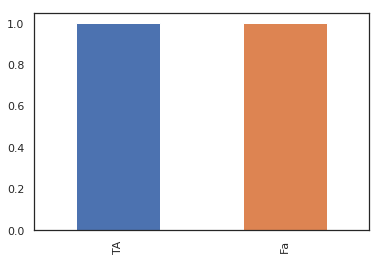

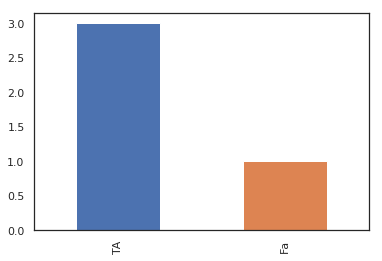

In [29]:
for ident in dataset[dataset.BsmtQual.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.LandSlope == thishouse.LandSlope) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    plt.figure()
    dataset.loc[mask, "BsmtQual"].value_counts().plot(kind = "bar")
    dataset.loc[ident, "BsmtQual"] = dataset.loc[mask, "BsmtQual"].mode().values[0]

In [30]:
dataset[dataset.BsmtFullBath.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2120,2121,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,4,2008,ConLD,Abnorml,NaN,0,0,0,0,0,1.995635
2188,2189,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NoFence,7,2008,WD,Normal,NaN,0,0,0,0,0,2.089905


In [31]:
for ident in dataset[dataset.BsmtFullBath.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.LandSlope == thishouse.LandSlope) &\
           (dataset.Neighborhood == thishouse.Neighborhood)        
    try:
        dataset.loc[ident, "BsmtFullBath"] = dataset.loc[mask, "BsmtFullBath"].mode().values[0]
    except:
        dataset.loc[ident, "BsmtFullBath"] = dataset.BsmtFullBath.mode().values[0]

2120
2188


In [32]:
dataset[dataset.BsmtHalfBath.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2120,2121,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,4,2008,ConLD,Abnorml,NaN,0,0,0,0,0,1.995635
2188,2189,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NoFence,7,2008,WD,Normal,NaN,0,0,0,0,0,2.089905


In [33]:
for ident in dataset[dataset.BsmtHalfBath.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.LandSlope == thishouse.LandSlope) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    try:
        dataset.loc[ident, "BsmtHalfBath"] = dataset.loc[mask, "BsmtHalfBath"].mode().values[0]
    except:
        dataset.loc[ident, "BsmtHalfBath"] = dataset.BsmtHalfBath.mode().values[0]

2120
2188


In [34]:
dataset[dataset.BsmtFinType2.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
332,333,20,RL,85.0,10655,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NoFence,10,2009,WD,Normal,284000.0,1,0,0,0,0,1.929419


In [35]:
for ident in dataset[dataset.BsmtFinType2.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.LandSlope == thishouse.LandSlope) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    try:
        dataset.loc[ident, "BsmtFinType2"] = dataset.loc[mask, "BsmtFinType2"].mode().values[0]
    except:
        dataset.loc[ident, "BsmtFinType2"] = dataset.BsmtFinType2.mode().values[0]
    print(dataset.loc[ident, "BsmtFinType2"])

332
Unf


In [36]:
mask = dataset.MasVnrType.isnull() & dataset.MasVnrArea.isnull()
dataset.loc[mask, "MasVnrArea"] = 0
dataset.loc[mask, "MasVnrType"] = "NoMasonry"

In [37]:
dataset[dataset.MasVnrType.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
2610,2611,20,RL,124.0,27697,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NaN,NoFence,11,2007,COD,Abnorml,NaN,0,0,0,0,0,2.093422


2610


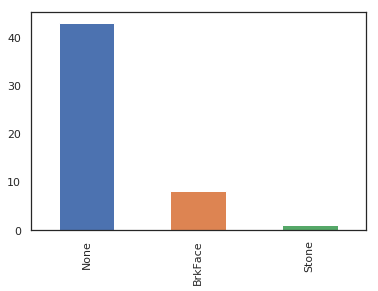

In [38]:
for ident in dataset[dataset.MasVnrType.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    
    plt.figure()
    dataset.loc[mask, "MasVnrType"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "MasVnrType"] = dataset.loc[mask, "MasVnrType"].mode().values[0]

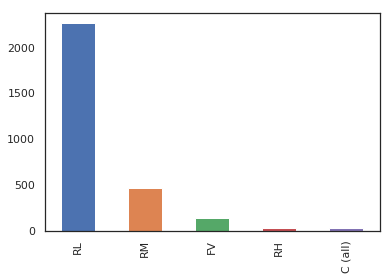

In [39]:
dataset.MSZoning.value_counts().plot(kind = "bar")

1915
2216
2250
2904


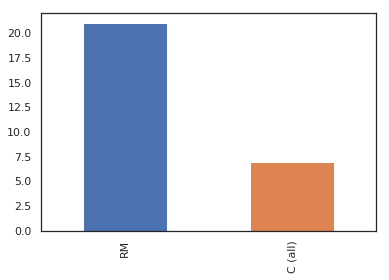

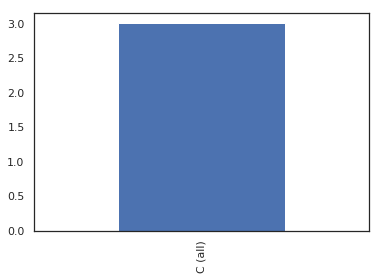

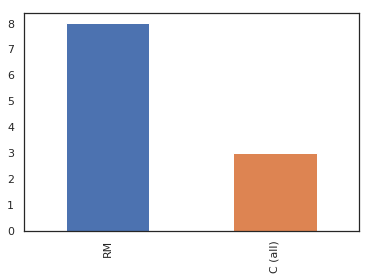

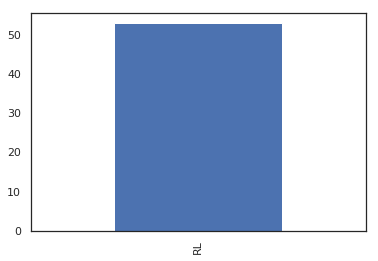

In [40]:
for ident in dataset[dataset.MSZoning.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.Neighborhood == thishouse.Neighborhood)    
    
    plt.figure()
    dataset.loc[mask, "MSZoning"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "MSZoning"] = dataset.loc[mask, "MSZoning"].mode().values[0]

1915
1945


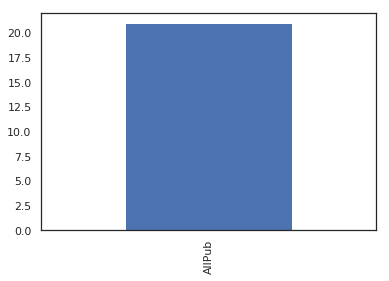

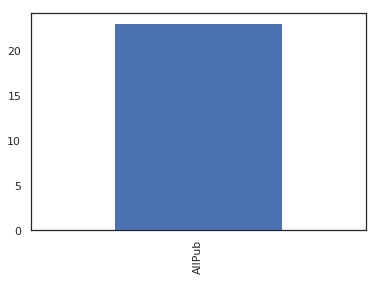

In [41]:
for ident in dataset[dataset.Utilities.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "Utilities"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "Utilities"] = dataset.loc[mask, "Utilities"].mode().values[0]

2216
2473


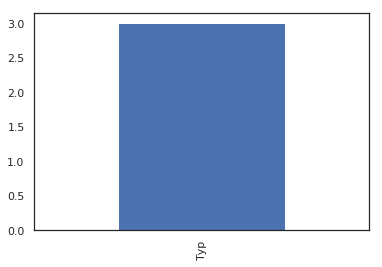

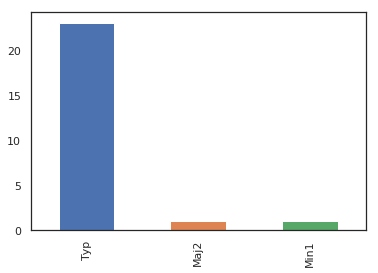

In [42]:
for ident in dataset[dataset.Functional.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "Functional"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "Functional"] = dataset.loc[mask, "Functional"].mode().values[0]

2151


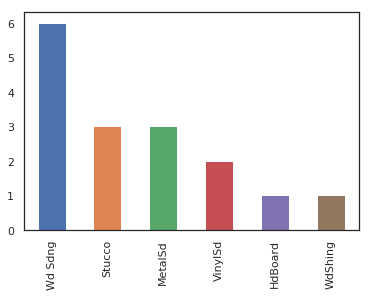

In [43]:
for ident in dataset[dataset.Exterior1st.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "Exterior1st"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "Exterior1st"] = dataset.loc[mask, "Exterior1st"].mode().values[0]

2151


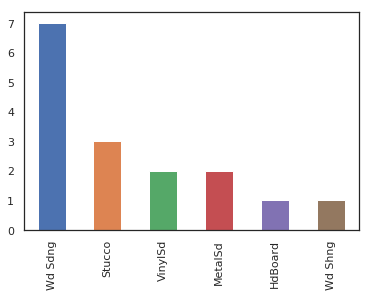

In [44]:
for ident in dataset[dataset.Exterior2nd.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "Exterior2nd"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "Exterior2nd"] = dataset.loc[mask, "Exterior2nd"].mode().values[0]

1379


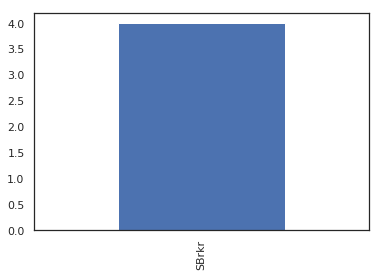

In [45]:
for ident in dataset[dataset.Electrical.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "Electrical"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "Electrical"] = dataset.loc[mask, "Electrical"].mode().values[0]

1555


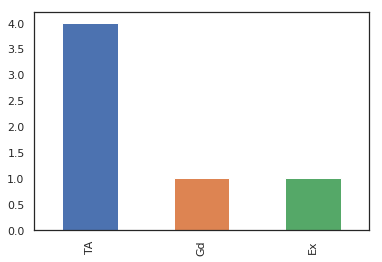

In [46]:
for ident in dataset[dataset.KitchenQual.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "KitchenQual"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "KitchenQual"] = dataset.loc[mask, "KitchenQual"].mode().values[0]

2489


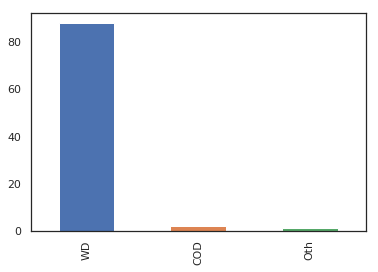

In [47]:
for ident in dataset[dataset.SaleType.isnull()].index:
    print(ident)
    thishouse = dataset.loc[ident]    
    mask = (dataset.MSSubClass == thishouse.MSSubClass) &\
           (dataset.MSZoning == thishouse.MSZoning) &\
           (dataset.Neighborhood == thishouse.Neighborhood)      
    
    plt.figure()
    dataset.loc[mask, "SaleType"].value_counts().plot(kind = "bar")    
    dataset.loc[ident, "SaleType"] = dataset.loc[mask, "SaleType"].mode().values[0]

In [48]:
dataset.loc[dataset.FireplaceQu.isnull(), "FireplaceQu"] = "NA"
dataset.loc[dataset.PoolQC.isnull(),"PoolQC"] = "NA"

In [49]:
null_values = []
for col in dataset.columns.values:
    null_values.append([col , dataset[col].isnull().sum()])

for el, tot in sorted(null_values, key = lambda item: item[1], reverse = True):
    if tot>0:
        print(el, tot)

SalePrice 1459


In [50]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NoFence,2,2008,WD,Normal,208500.0,1,0,0,0,0,1.812913
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NoFence,5,2007,WD,Normal,181500.0,1,0,0,0,0,1.903090
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NoFence,9,2008,WD,Normal,223500.0,1,0,0,0,0,1.832509
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NoFence,2,2006,WD,Abnorml,140000.0,1,0,0,0,0,1.778151
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NoFence,12,2008,WD,Normal,250000.0,1,0,0,0,0,1.924279


In [51]:
# Encoding "Fence"
dataset["Fence_Privacy"] = 0
dataset.loc[dataset.Fence == "GdPrv", "Fence_Privacy"] = 2
dataset.loc[dataset.Fence == "MnPrv", "Fence_Privacy"] = 1
dataset["Fence_Wood"] = 0
dataset.loc[dataset.Fence == "GdWo", "Fence_Wood"] = 2
dataset.loc[dataset.Fence == "MnWw", "Fence_Wood"] = 1
dataset["Fence_NoFence"] = 0
dataset.loc[dataset.Fence == "NoFence", "Fence_NoFence"] = 1
dataset = dataset.drop(columns = ["Fence"])

In [52]:
#One hot encoding
OHE_features = ["MSSubClass","MSZoning", "Street", "Alley" ,"LandContour", "LotConfig", "Neighborhood", 
                "Condition1", "Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st",
                "Exterior2nd","MasVnrType", "Foundation", "BsmtFinType1", "BsmtFinType2",
                "Heating","CentralAir", "Electrical", "GarageType", "PavedDrive", "SaleType", "SaleCondition"]
for feature in OHE_features:
    print(feature)
    try:
        ohe = OneHotEncoder()
        matr = ohe.fit_transform(dataset[feature].values.reshape(-1,1)).toarray()
        tmpDf = pd.DataFrame(matr, columns= [feature+"_"+str(c) for c in ohe.categories_[0]])    
        print("Number of missing encoding: ", (tmpDf.sum(axis = 1) != 1).sum())            
        dataset = pd.concat([dataset, tmpDf], axis = 1)       
    except KeyError:
        print("Alreay analysed")
dataset.head()

MSSubClass
Number of missing encoding:  0
MSZoning
Number of missing encoding:  0
Street
Number of missing encoding:  0
Alley
Number of missing encoding:  0
LandContour
Number of missing encoding:  0
LotConfig
Number of missing encoding:  0
Neighborhood
Number of missing encoding:  0
Condition1
Number of missing encoding:  0
Condition2
Number of missing encoding:  0
BldgType
Number of missing encoding:  0


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


HouseStyle
Number of missing encoding:  0
RoofStyle
Number of missing encoding:  0
RoofMatl
Number of missing encoding:  0
Exterior1st
Number of missing encoding:  0
Exterior2nd
Number of missing encoding:  0
MasVnrType
Number of missing encoding:  0
Foundation
Number of missing encoding:  0
BsmtFinType1
Number of missing encoding:  0
BsmtFinType2
Number of missing encoding:  0
Heating
Number of missing encoding:  0
CentralAir
Number of missing encoding:  0
Electrical
Number of missing encoding:  0
GarageType
Number of missing encoding:  0
PavedDrive
Number of missing encoding:  0
SaleType
Number of missing encoding:  0
SaleCondition
Number of missing encoding:  0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10,Fence_Privacy,Fence_Wood,Fence_NoFence,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NoMasonry,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,Garage

In [53]:
# Encoding "LotShape"
lotshape_categories = {"Reg":3, "IR1":2, "IR2":1, "IR3":0}
utilities_categories = {"AllPub":3, "NoSewr":2, "NoSeWa":1, "ELO":0}
landslope_categories = {"Gtl":2, "Mod": 1, "Sev":0}
standard_categories = {"NA":0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex":5}
bsmtexposure_categories = {"Gd":4, "Av":3, "Mn":2, "No":1,"NA":0}
bsmtfintype_categories = {"GLQ":6, "ALQ":5, "BLQ": 4, "Rec":3, "LwQ":2,"Unf":1, "NA":0}
functionality_categories = {"Sal": 0,"Typ":7, "Min1":6,"Min2":5, "Mod":4, "Maj1":3, "Maj2":2, "Sev":1}
garagefinsih_categories =  {"NA":0, "Unf": 1, "RFn": 2, "Fin": 3}

dataset = dataset.replace({"LotShape": lotshape_categories,
                           "Utilities": utilities_categories, 
                           "LandSlope":landslope_categories, 
                           "ExterQual": standard_categories, 
                           "ExterCond":standard_categories, 
                           "BsmtQual": standard_categories, 
                           "BsmtCond": standard_categories, 
                           "BsmtExposure": bsmtexposure_categories, 
                           "BsmtFinType1": bsmtfintype_categories, 
                           "BsmtFinType2": bsmtfintype_categories, 
                           "HeatingQC": standard_categories, 
                           "KitchenQual":standard_categories, 
                           "Functional":functionality_categories,
                           "GarageQual":standard_categories, 
                           "GarageCond": standard_categories,
                           "GarageFinish": garagefinsih_categories,
                           "FireplaceQu": standard_categories, 
                           "PoolQC": standard_categories})

In [54]:
dataset.loc[~dataset.SalePrice.isnull(),"LogSalePrice"] = np.log(dataset.loc[~dataset.SalePrice.isnull(),"SalePrice"])

In [55]:
dataset.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10,Fence_Privacy,Fence_Wood,Fence_NoFence,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NoMasonry,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,Garage

Store the original dataset in a variable so that we can access without rerunning the script later on

In [56]:
import copy

if original_dataset is None:
    original_dataset = copy.deepcopy(dataset)
    
try:
    dataset = dataset.drop(columns = OHE_features)
except:
    pass

# Analysis of the features

Let's start by analysing the data.
First, let's see how the price is distributed (to find outliers, etc)

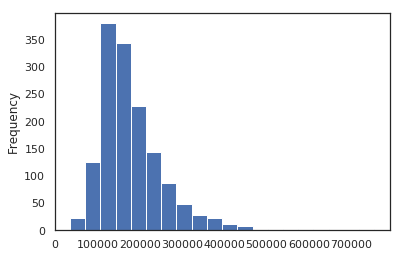

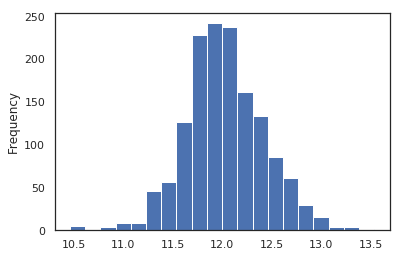

In [57]:
original_dataset.SalePrice.plot(kind = "hist", bins = 20)
plt.figure()
original_dataset.LogSalePrice.plot(kind = "hist", bins = 20)

The distribution of the logarithm of the sales prices looks quite normally distributed. There are some outiliers beyond the 25-75 percentiles, but that should be fine

In [58]:
dataset.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10,Fence_Privacy,Fence_Wood,Fence_NoFence,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NoMasonry,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondit

Let's see, what are the main features that might make sense to analyse? 

In [59]:
idx = np.where((dataset["1stFlrSF"]+dataset["2ndFlrSF"] + dataset["LowQualFinSF"]  - dataset.GrLivArea)!=0)
print(idx)

(array([], dtype=int64),)


We can see that the total above ground area is the sum of the floors and the low quality finish area. Therefore there is some kind of redundancy that we will need to consider. 
Let's create a new column that consider the total area that has good quality

In [60]:
dataset["GoodQualFinSF_ratio"]= 1-  dataset["LowQualFinSF"]  / dataset.GrLivArea

In [61]:
cat = ["LotFrontage", "LotArea", "LotShape","Utilities", "LandSlope","OverallQual", "OverallCond", "YearBuilt", 
      "YearRemodAdd", "BsmtCond", "BsmtQual","TotalBsmtSF","GrLivArea","GoodQualFinSF_ratio"]

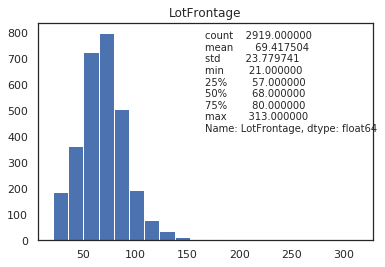

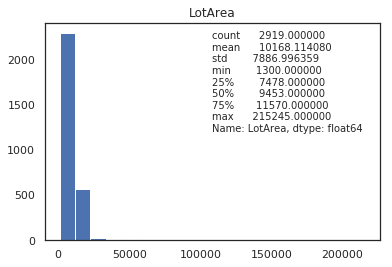

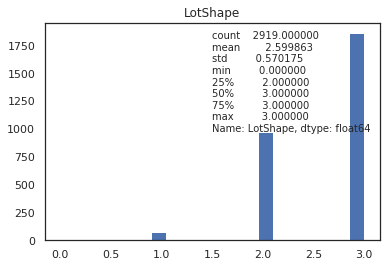

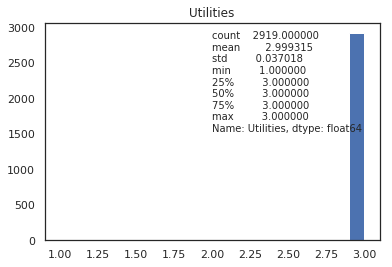

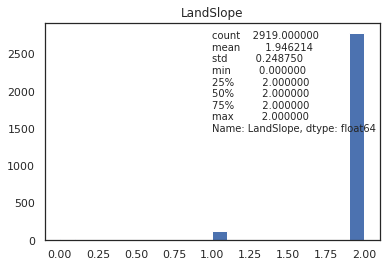

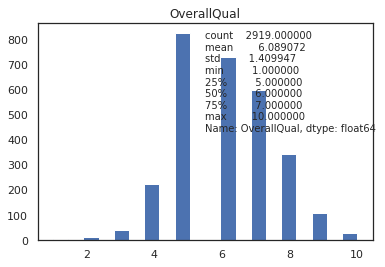

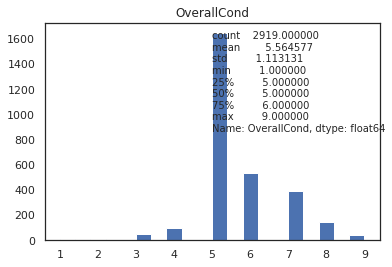

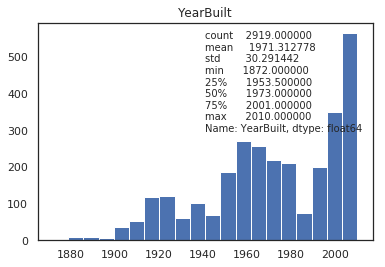

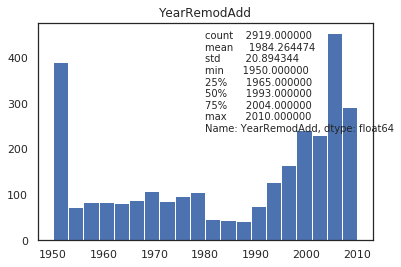

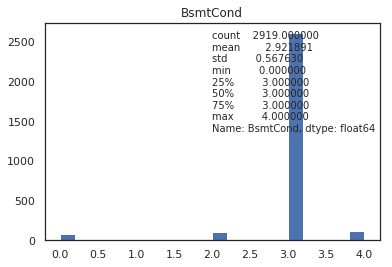

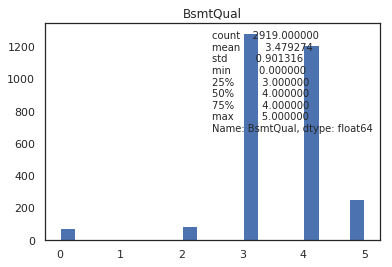

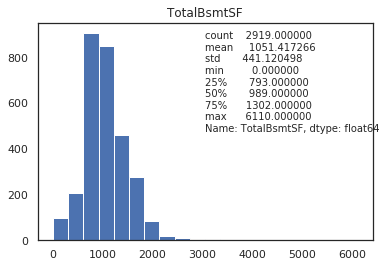

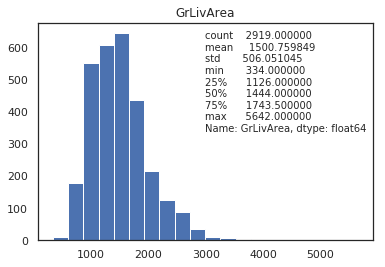

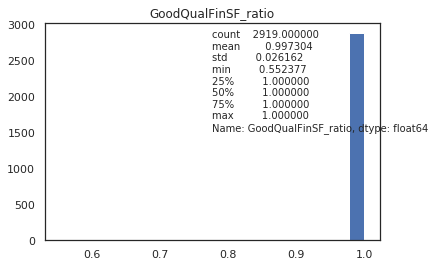

In [62]:
for c in cat:
    plt.figure()
    plt.hist(dataset[c], bins= 20)
    plt.text(x = np.array(plt.xlim()).mean(), y = np.array(plt.ylim()).mean(),s = str(dataset[c].describe()))
    plt.title(c)

We can see that some of these features show clear outliers. Can we see if these correlate to high prices somehow?

## Feature engineering

Let's create some new features

In [63]:
dataset["LotDepth"] = dataset.LotArea /dataset.LotFrontage
dataset["LotStandardizedLinearSize"] = np.sqrt(dataset.LotArea) 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


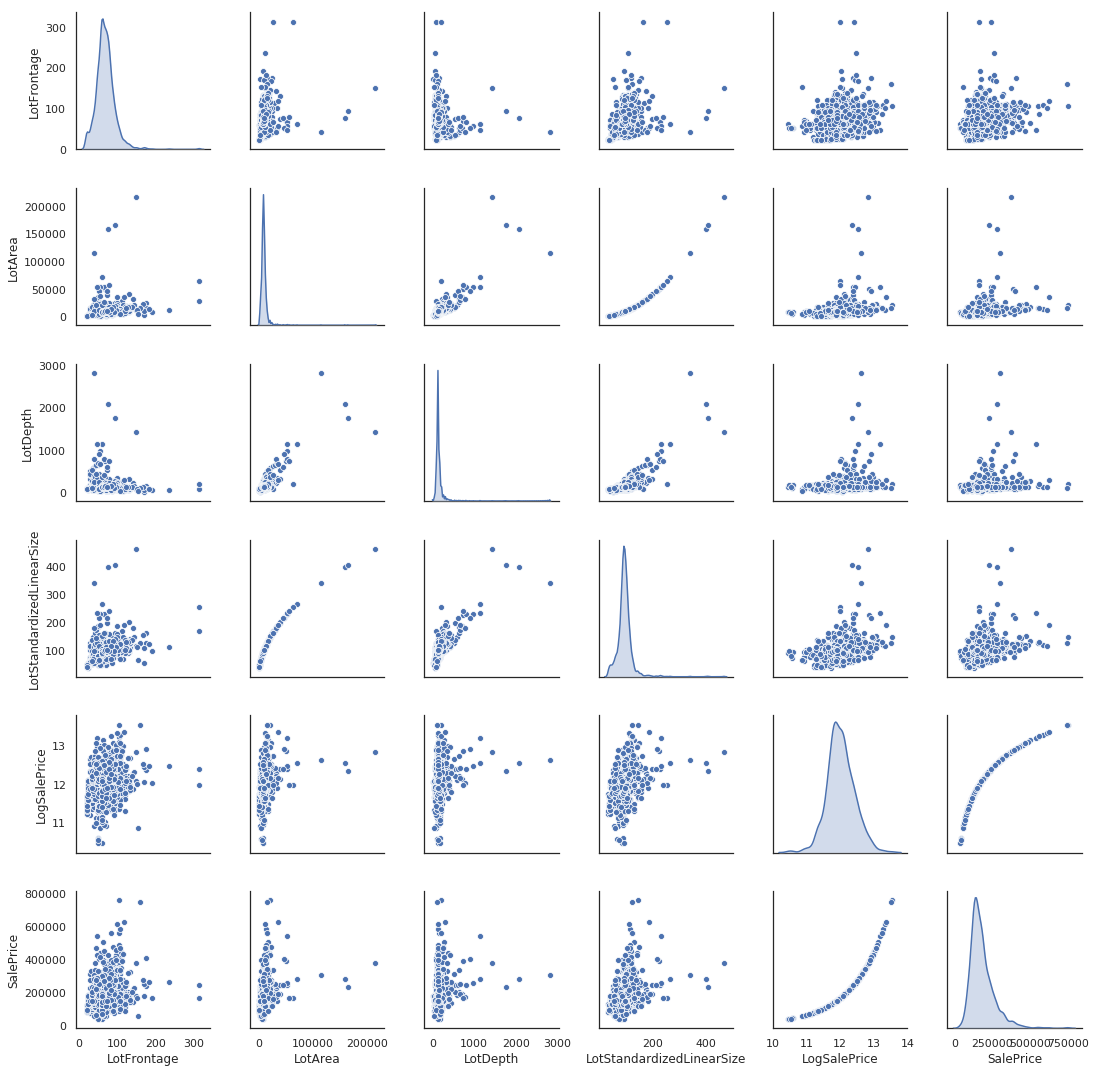

In [64]:
sns.pairplot(data = dataset[~(dataset.LogSalePrice.isnull())], vars = ["LotFrontage","LotArea","LotDepth","LotStandardizedLinearSize", "LogSalePrice", "SalePrice"],
             diag_kind = "kde")

In [65]:
columns_to_transform = dataset.columns.values[1:51]
print(dataset.columns.values[1:51]) 
for i in columns_to_transform:
    dataset[i+"_2"] = dataset[i]**2
    dataset[i+"_3"] = dataset[i]**3
    dataset[i+"_4"] = dataset[i]**4

['LotFrontage' 'LotArea' 'LotShape' 'Utilities' 'LandSlope' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinSF1'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageYrBlt' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'PoolQC' 'MoSold' 'YrSold']


### Analysis of few dependencies

Here, I correlate the LogSalePrice with the other features and print only those with a strong correlation. 
Problem: this is valid only for linear correlated data.

In [66]:
correlations = original_dataset.loc[original_dataset.columns.values !="SalePrice"].corrwith(original_dataset.LogSalePrice)
columns = original_dataset.loc[original_dataset.columns.values !="SalePrice"].columns.values
for idx, i in enumerate(correlations):
    if abs(i)>0.5:
        print(columns[idx], i)          

LotShape 0.8138244913542118
Utilities 0.5901367230534976
LotConfig 0.578201344227333
Neighborhood 0.6723110219403418
Condition2 0.6410933391078019
RoofMatl 0.631222735494323
Exterior1st 0.5015673921522914
Exterior2nd 0.5825791002272791
ExterQual 0.735110388622262
BsmtQual 0.5664712573369634
BsmtFinSF1 0.7072549918158828
BsmtFinType2 0.5633333816208546
BsmtUnfSF 0.5035131939837996
TotalBsmtSF 0.5911010315301759
HeatingQC 0.6135955457704314
CentralAir 0.7088445581647609
Electrical 0.6847573725659664
TotRmsAbvGrd 0.9628721051735921
GarageType_Basment 1.0


In [67]:
from sklearn.feature_selection import SelectKBest, f_regression        
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
selector = make_pipeline(StandardScaler(),SelectKBest(f_regression, k=4))
selector.fit(dataset.loc[~dataset.LogSalePrice.isnull(), dataset.columns.values !="LogSalePrice"], dataset.loc[~dataset.LogSalePrice.isnull(),"LogSalePrice"])
print(dataset.loc[:, dataset.columns.values !="LogSalePrice"].columns.values[selector.named_steps["selectkbest"].get_support()])

['OverallQual' 'SalePrice' 'OverallQual_2' 'OverallQual_3']


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn

In [68]:
original_dataset.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10,Fence_Privacy,Fence_Wood,Fence_NoFence,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NoMasonry,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,Garage

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


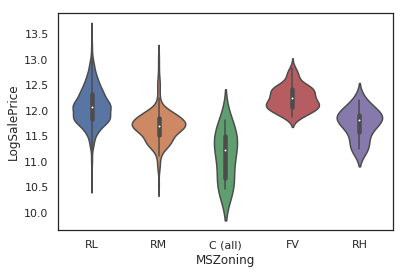

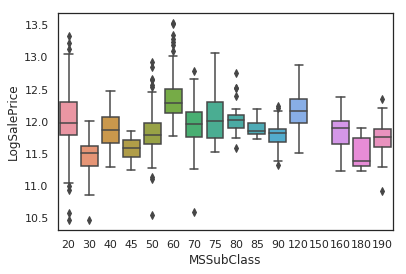

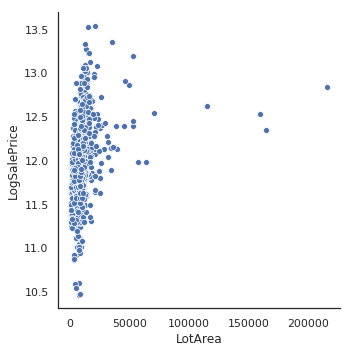

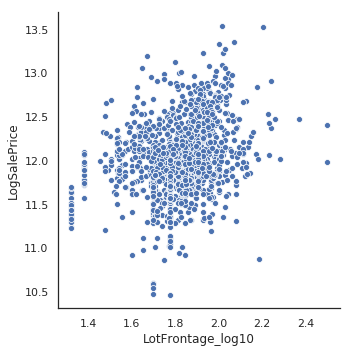

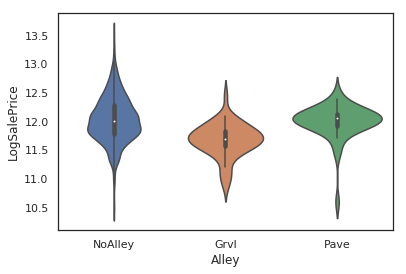

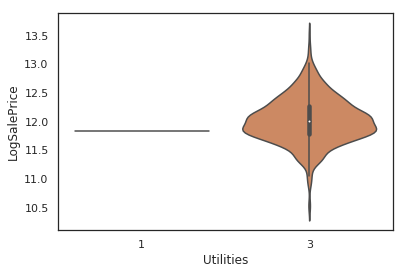

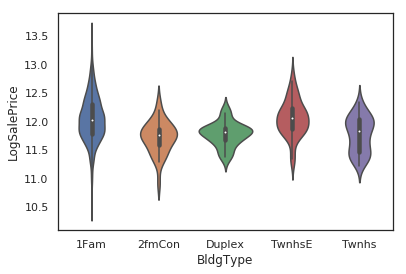

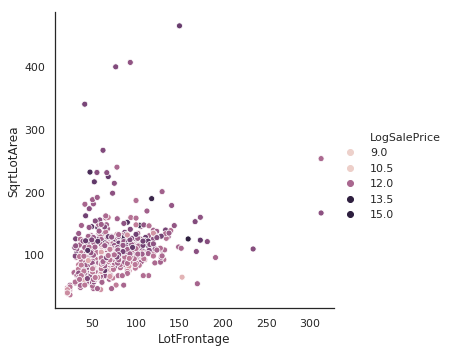

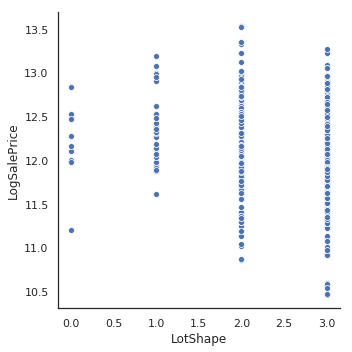

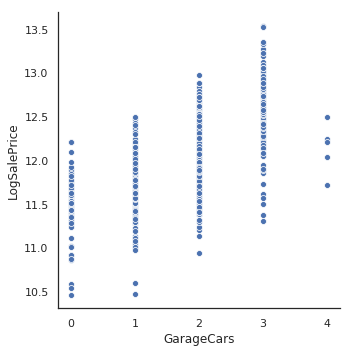

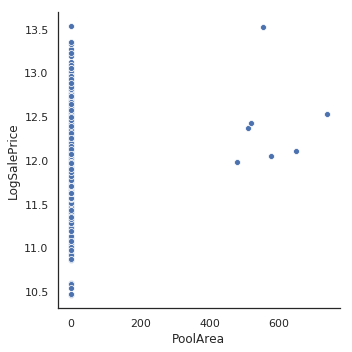

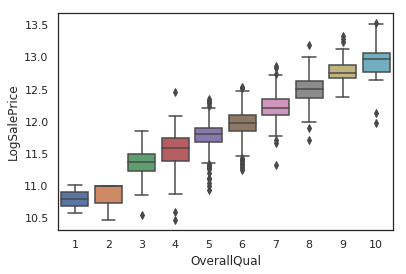

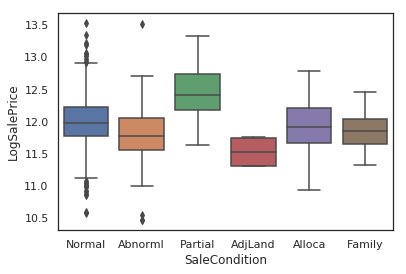

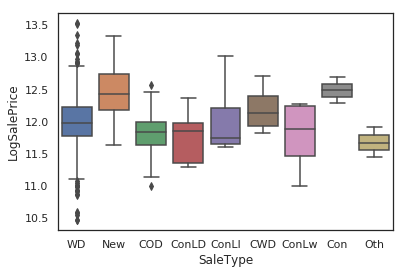

In [69]:
sns.violinplot(x = "MSZoning", y ="LogSalePrice", data = original_dataset)
plt.figure()
sns.boxplot(x = "MSSubClass", y ="LogSalePrice", data = original_dataset)
sns.relplot(x = "LotArea",  y = "LogSalePrice", data = original_dataset)
sns.relplot(x = "LotFrontage_log10",  y = "LogSalePrice", data = original_dataset)
plt.figure()
sns.violinplot(x = "Alley", y = "LogSalePrice", data = original_dataset)
plt.figure()
sns.violinplot(x = "Utilities", y = "LogSalePrice", data = original_dataset)
plt.figure()
sns.violinplot(x = "BldgType", y = "LogSalePrice", data = original_dataset)

original_dataset["SqrtLotArea"] = np.sqrt(original_dataset.LotArea)
sns.relplot(x = "LotFrontage",  y = "SqrtLotArea", data = original_dataset, hue = "LogSalePrice")
sns.relplot(x = "LotShape",  y = "LogSalePrice", data = original_dataset)
sns.relplot(x = "GarageCars",  y = "LogSalePrice", data = original_dataset)
sns.relplot(x = "PoolArea",  y = "LogSalePrice", data = original_dataset)
plt.figure()
sns.boxplot(x = "OverallQual",  y = "LogSalePrice", data = original_dataset)
plt.figure()
sns.boxplot(x = "SaleCondition",  y = "LogSalePrice", data = original_dataset)
plt.figure()
sns.boxplot(x = "SaleType",  y = "LogSalePrice", data = original_dataset)

So far, the only strong correlation is the "Overall Quality".

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LotFrontage_log10,Fence_Privacy,Fence_Wood,Fence_NoFence,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NoMasonry,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,Garage

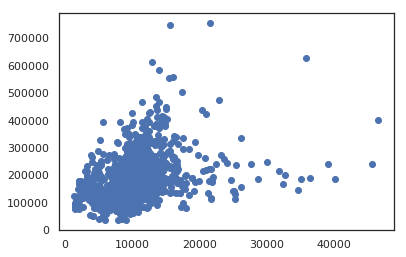

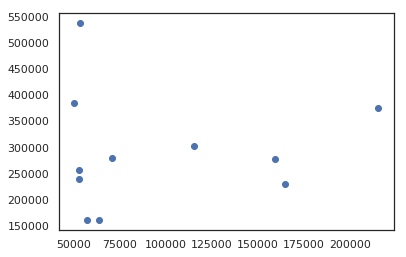

In [70]:
mask = original_dataset.LotArea<50000
mask1 = original_dataset.LotArea>50000
plt.scatter(original_dataset.loc[mask, "LotArea"], original_dataset.loc[mask, "SalePrice"])
plt.figure()
plt.scatter(original_dataset.loc[mask1, "LotArea"], original_dataset.loc[mask1, "SalePrice"])
original_dataset[mask1]

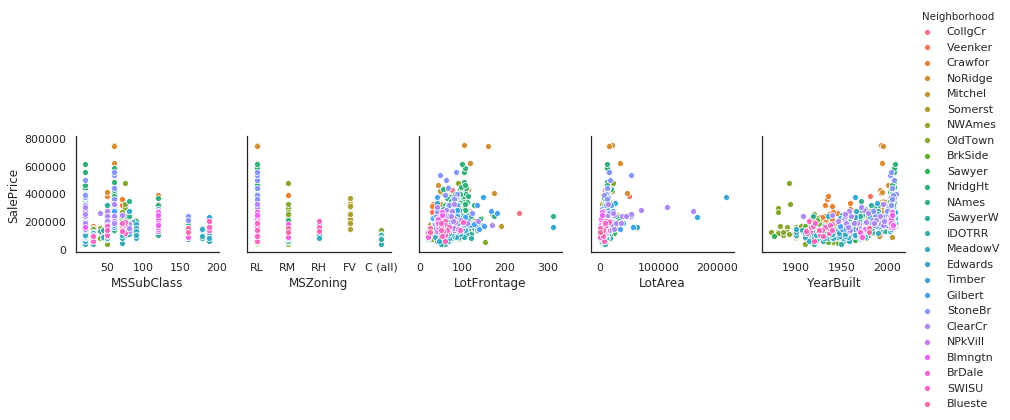

In [71]:
sns.pairplot(original_dataset,
             hue = "Neighborhood",
             x_vars = ["MSSubClass","MSZoning","LotFrontage","LotArea","YearBuilt"], 
             y_vars = ["SalePrice"])

In [72]:
dataset = dataset.drop(columns = ["SalePrice", "LotFrontage_log10"])
# dataset = dataset.drop(columns = ["LogSalePrice", "LotFrontage_log10"])

train_dataset = dataset[dataset.Train == 1].drop(columns = ["Id"])
submit_dataset = dataset[dataset.Train == 0]
train_dataset.to_pickle("train_dataset.pkl")
submit_dataset.to_pickle("submit_dataset.pkl")
Id_subm = submit_dataset.Id.values
submit_dataset = submit_dataset.drop(columns = ["Id", "LogSalePrice"])

In [73]:
X = train_dataset.loc[:, train_dataset.columns!="LogSalePrice"].values
Y = train_dataset.loc[:, train_dataset.columns=="LogSalePrice"].values.ravel()
X_subm = submit_dataset.values
print(X.shape)
print(Y.shape)
print(X_subm.shape)
print(Id_subm.shape)

(1460, 409)
(1460,)
(1459, 409)
(1459,)


# Here the machine learning stuff starts.....

First, let's define some useful functions for later on.

In [74]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn_pandas import DataFrameMapper

def error(ytrue, ypred):    
    ypred[ypred<0] = 1e-20
    return np.sqrt(mean_squared_error(np.log(ytrue), np.log(ypred)))

msel = make_scorer(error, greater_is_better= False)

def plot_curves(x, train,val, kind):
    l1, = plt.plot(x, train.mean(axis = 1), label = "Training set")
    plt.fill_between(x,train.mean(axis = 1)+train.std(axis = 1),
                     train.mean(axis = 1)-train.std(axis = 1), alpha = 0.3, color = l1.get_color())
    l2, = plt.plot(x, val.mean(axis = 1), label = "Validation set")
    plt.fill_between(x,val.mean(axis = 1)+val.std(axis = 1),
                     val.mean(axis = 1)-val.std(axis = 1), alpha = 0.3, color = l2.get_color())
    plt.legend()
    plt.title(str(kind))
    return plt.gca()
    


In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.25)

## Lasso Regression

Let's start with Lasso regression. The Lasso regressor uses a L1-norm to regularize the weights of the model, thus linearly penalizing the magnitude of the weights and forcing them to be equal to zero. This could give insights into which features are the most critical to determine the price of the house.

First of all, let's make a pipeline to perform Feature scaling before performing the Lasso regression.

In [76]:
from sklearn.linear_model import Lasso

lasso_pipe = make_pipeline(StandardScaler(),    
                           Lasso())

Now, let's have a look at the validation curve as a function of the _regularization parameter_ $\alpha$.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.1s finished


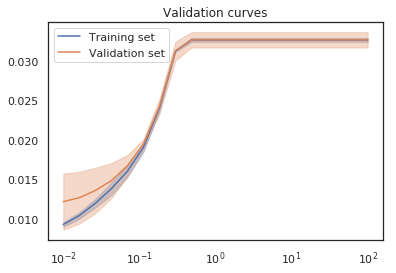

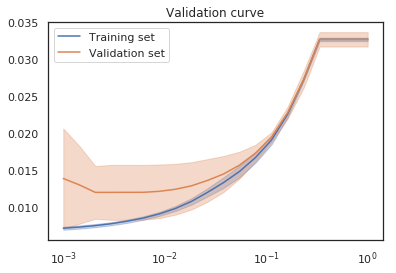

In [77]:
alpha = np.logspace(-2, 2, 20)
val_train_scores, val_valid_scores = validation_curve(estimator = lasso_pipe,
                                              X=Xtrain, 
                                              y=ytrain, 
                                              param_name="lasso__alpha",
                                              param_range = alpha,
                                              cv=5,
                                              scoring=msel,
                                              verbose = 1,
                                              n_jobs = -1)

ax = plot_curves(alpha,abs(val_train_scores), abs(val_valid_scores), "Validation curves")
ax.set_xscale("log")

alpha = np.logspace(-3, 0, 20)
val_train_scores, val_valid_scores = validation_curve(estimator = lasso_pipe,
                                              X=Xtrain, 
                                              y=ytrain, 
                                              param_name="lasso__alpha",
                                              param_range = alpha,
                                              cv=5,
                                              scoring=msel,
                                              verbose = 1,
                                              n_jobs = -1)

plt.figure()
ax = plot_curves(alpha,abs(val_train_scores), abs(val_valid_scores), "Validation curve")
ax.set_xscale("log")

Here, we see that the cost (scoring function) increases as $\alpha$ increases. However, the cost of the validation set for small $\alpha$ is relatively high (underfitting). Therefore, we expect that an $\alpha$ around 0.01-0.1 should be a good choice. 

Let's see what happens with the learning curves. Here we can judge whether the model is redundant or not. 

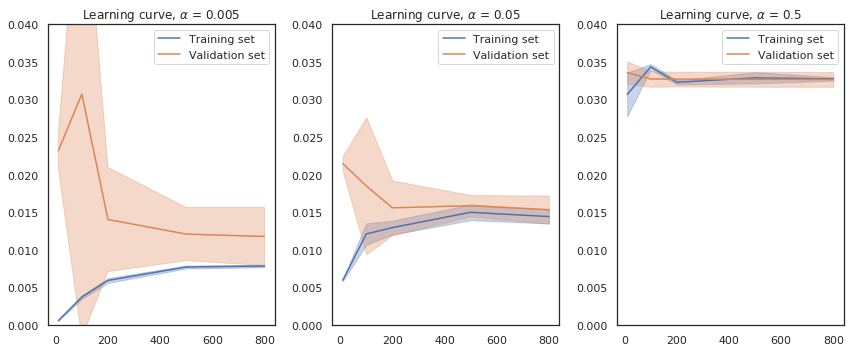

In [78]:
limits = [0, 0.04]
lasso_pipe.named_steps["lasso"].alpha = 0.005
train_sizes, train_scores, valid_scores = learning_curve(lasso_pipe, Xtrain, ytrain, train_sizes=[10, 100, 200, 500, 800], cv=5,
                                                         scoring=msel, n_jobs = -1)
plt.figure(figsize = (12,5))
plt.subplot(131)
plot_curves(train_sizes, abs(train_scores), abs(valid_scores), r"Learning curve, $\alpha$ = 0.005")
plt.ylim(limits)


lasso_pipe.named_steps["lasso"].alpha = 0.05
train_sizes, train_scores, valid_scores = learning_curve(lasso_pipe, Xtrain, ytrain, train_sizes=[10, 100, 200, 500, 800], cv=5,
                                                         scoring=msel, n_jobs = -1)
plt.subplot(132)
plot_curves(train_sizes,  abs(train_scores), abs(valid_scores), r"Learning curve, $\alpha$ = 0.05")
plt.ylim(limits)

lasso_pipe.named_steps["lasso"].alpha = 0.5
train_sizes, train_scores, valid_scores = learning_curve(lasso_pipe, Xtrain, ytrain, train_sizes=[10, 100, 200, 500, 800], cv=5,
                                                         scoring=msel, n_jobs = -1)
plt.subplot(133)
plot_curves(train_sizes,  abs(train_scores), abs(valid_scores), r"Learning curve, $\alpha$ = 0.5")
plt.ylim(limits)
plt.tight_layout()

We can see here that for low $\alpha$ the overall error is low, however the model suffers from high variance (train and cv set are distant from each other). As $\alpha$ increases, the variance diminishes but the cost increases. 

From these plots, it seems like an $\alpha$ = 0.05 seems a reasonable choice.

Lasso score: -0.009827773155933394


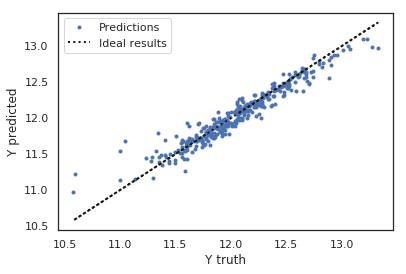

In [79]:
lasso_pipe.named_steps["lasso"].alpha = 0.005
xtr, xcv, ytr, ycv = train_test_split(Xtrain, ytrain, test_size = 0.20)
lasso_pipe.fit(xtr, ytr)
print("Lasso score: {0}".format(msel(lasso_pipe,Xtest, ytest)))
plt.figure()
plt.plot(ytest, lasso_pipe.predict(Xtest), ".", label = "Predictions")
plt.plot(ytest, ytest, "k:", lw = 2 , label = "Ideal results")
plt.legend()
plt.xlabel("Y truth")
plt.ylabel("Y predicted");

Let's see what happens if we make a grid search (we should get a similar result).

In [80]:
lasso_gridseach = GridSearchCV(lasso_pipe, param_grid = {"lasso__alpha": np.logspace(-3,0,50)}, cv = 5, 
                               scoring = msel, verbose = True, n_jobs = -1)
lasso_gridseach.fit(Xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   35.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': array([0.001  , 0.00115, 0.00133, 0.00153, 0.00176, 0.00202, 0.00233,
       0.00268, 0.00309, 0.00356, 0.00409, 0.00471, 0.00543, 0.00625,
       0.0072 , 0.00829, 0.00954, 0.01099, 0.01265, 0.01456, 0.01677,
       0.01931, 0.02223, 0.0256 , 0.02947, 0.03393, 0.03907, 0...18, 0.32375,
       0.37276, 0.42919, 0.49417, 0.56899, 0.65513, 0.75431, 0.86851,
       1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(error, greater_is_better=False), verbose=True)

In [81]:
print("Lasso score (from manual search): {0}".format(msel(lasso_pipe, Xtest, ytest)))
print("Lasso score (from GSCV): {0}".format(msel(lasso_gridseach, Xtest, ytest)))
print("Alpha from gscv: {0}".format(lasso_gridseach.best_params_))

Lasso score (from manual search): -0.009827773155933394
Lasso score (from GSCV): -0.009777570217167337
Alpha from gscv: {'lasso__alpha': 0.004714866363457394}


As we can see, we found a value of $\alpha$ very close to the one returned by the grid search.

Now, let's see which are the main features

In [82]:
theta = lasso_pipe.steps[1][1].coef_
print("### Parameters with (absolute) non-zero weights ###")
for i in np.argsort(np.abs(theta))[::-1][:10]:
    if theta[i] != 0:
        print(train_dataset.columns.values[i], "\t", theta[i])

theta = lasso_gridseach.best_estimator_.steps[1][1].coef_
print("\n\n### Parameters with (absolute) non-zero weights ###")
for i in np.argsort(abs(theta))[::-1][:10]:
    if theta[i] != 0:
        print(train_dataset.columns.values[i], "\t", theta[i])

### Parameters with (absolute) non-zero weights ###
GrLivArea 	 0.14072276133082087
GrLivArea_3 	 -0.06311394330006924
LandSlope_4 	 0.04912032192809812
TotalBsmtSF 	 0.04185500047739719
1stFlrSF_3 	 -0.03459214371627456
OverallCond 	 0.030919006401788646
MSZoning_C (all) 	 -0.028363302338636105
LotDepth 	 0.0280899210847043
OverallQual 	 0.025329362170383687
YearBuilt_3 	 0.02389669097588624


### Parameters with (absolute) non-zero weights ###
GrLivArea 	 0.13714461737252204
OverallQual 	 0.05771193391632751
TotalBsmtSF 	 0.04209597964412683
TotalBsmtSF_3 	 -0.035799663701823
GrLivArea_3 	 -0.03325028629608502
OverallCond 	 0.03217423566004313
LotDepth 	 0.0271849333834353
BsmtFinSF1 	 0.02612917657678289
MSZoning_C (all) 	 -0.024708475525163046
YearBuilt_3 	 0.02373591021769267


In [83]:
res = np.zeros((X_subm.shape[0],2))
res[:,0] = Id_subm
res[:,1] = np.exp(lasso_gridseach.predict(X_subm))
np.savetxt("submission.csv", res, header = "Id,SalePrice", delimiter = ",", fmt = "%d", comments = '')